# NAME: MD ASADUZZAMAN
# #GRIPAPRIL21
# Task 2: Prediction Using Unsupervised ML

# Step1: Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step2: imprting the dataset

In [3]:
dataset = pd.read_csv("Iris.csv")
x = dataset.iloc[:, [1, 2, 3, 4]].values
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Step3: plotting the elbow method

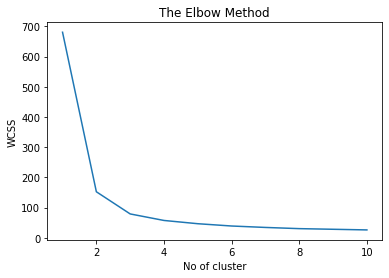

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++',max_iter= 300 ,n_init =10, random_state=(10))
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.show()

# Step 5: trainig the dataset model on the kmeans

In [5]:
kmeans = KMeans(n_clusters = 3,max_iter= 300, init= 'k-means++',random_state=(10))
y_kmeans = kmeans.fit_predict(x)

# Step6: Plotting the scatter

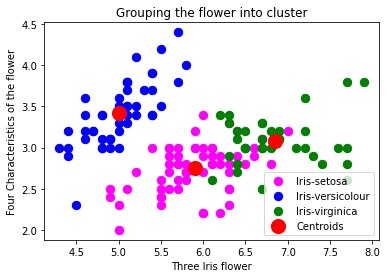

In [6]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 70, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.xlabel("Three Iris flower")
plt.ylabel("Four Characteristics of the flower")
plt.title("Grouping the flower into cluster")
plt.legend()
plt.show()

# Step7 : Prediction for new input data

In [11]:
a,b,c,d = input().split()
new_input = [[a,b,c,d]]
new_output = kmeans.predict(new_input)
if new_output == 0:
    print("Predicted flower is = Iris-setosa")
if new_output == 1:
    print("Predicted flower is = Iris-versicolour")
if new_output ==2:
    print("Predicted flower is = Iris-virginica")
print(new_output)

3.4 3 2.3 0.5
Predicted flower is = Iris-versicolour
[1]


# Step8 : Checking the error

In [12]:
compare = pd.crosstab([1],kmeans.labels_)  
compare

col_0,0,1,2
row_0,,,
1,62,50,38
